# Data Analysis in Jupyter Notebook (Part 2)

We will reproduce parts of a recent publication:

Wolf, S. and Mahecha, M. D. and Sabatini, F. M. and Wirth, C. and Bruelheide, H. and Kattge, J. and Moreno Martínez, Á. and Mora, K. and Kattenborn, T., **Citizen science plant observations encode global trait patterns**. Nat Ecol Evol (2022). https://doi.org/10.1038/s41559-022-01904-x

The full documentation can found at: https://github.com/sojwolf/iNaturalist_traits

## Research question

Can we use citizen science plant observations to map plant functional traits on a global scale?

Plant traits are morphological, anatomical, physiological, biochemical and phenological characteristics of plants. They determine how a plant responds to and shapes its environment. The collective range of all traits of all plants within a plant community defines this community's functional diversity (see Kattge et al. 2020).

<img align="left" src="Figures/Winterschool_tutorial." width="900" >

## The Data

- iNaturalist - species observations
- TRY - plant trait measurements
- sPlotOpen - vegetaiton community data

## iNaturalist citizen science observations

For this workshop we will use the following download: GBIF.org (4 January 2022) GBIF Occurrence Download https://doi.org/10.15468/dl.34tjre

For future reference, if you would like to use the most recent data: Follow the above link and click **'Rerun Query'** and proceed to download. For this analysis the 'simple' version is sufficient.

### 🤖 Try it!

**Take a few minutes to explore iNaturalist "research-grade" dataset on www.gbif.org.**

**1. How is "research-grade" defined in the iNaturalist dataset?**

**2. Rerun the query - how many vascular plant observations are in the iNaturalist "research-grade" dataset to date?**


For this tutorial, the following dataframe is already preprocessed a bit. Only the following columns were extracted and we will disregard subspecies level: the species names contain only genus and species.

- gbifID
- scientificName
- decimalLatitude
- decimalLongitude
- eventDate
- dateIdentified

In [1]:
import os # operating system interfaces

# set working directory
os.chdir('./Data')
os.getcwd()

'/net/home/swolf/iNaturalist/Data'

In [2]:
import pandas as pd # for handling dataframes in python

iNat = pd.read_csv('iNat_observations.csv')

In [3]:
iNat.head()

,gbifID,scientificName,decimalLatitude,decimalLongitude,eventDate,dateIdentified
0,1229615436,Commelina communis,35.987483,-79.057546,2013-07-07T00:00:00,2013-07-07T20:33:11
1,1802610589,Blitum capitatum,40.320259,-105.604856,2013-08-24T13:30:00,2019-09-02T01:11:54
2,1212005116,Passiflora vitifolia,23.189257,-106.404924,2014-03-18T12:49:37,2017-02-23T17:24:07
3,911497199,Cymbalaria muralis,37.996569,-123.018465,2014-05-23T08:58:53,2014-05-24T15:42:54
4,1038333063,Xanthium spinosum,37.934966,-122.148014,2014-10-13T18:00:04,2014-10-14T07:24:41


### 🤖 Try it!

**1. How many observations does this dataset contain?**

**2. How many unique species?**

**3. The number of observations per unique species is highly squewed. Most species are rare and few are common. Plot a histogramm showing this frequency distribution of species.**

Note: Use Python or R. If you want to use R, don't forget to initialize R magic.

In [4]:
# Number of observations in dataset

In [5]:
# Number of unique species

In [6]:
# Histogram of species frequencies

---

### Plot density of observations

One version of plotting the density, is by aggregating the iNaturalist observations in hexagonal bins and count the number of observations per hexagon. The function ```hexbin``` provides this functionality.

In [7]:
import matplotlib.pyplot as plt # main Python plotting library 
import seaborn as sns # pretty plots
import cartopy.crs as ccrs # maps 

def hexmap(long, lat, label):
    
    ax = plt.subplot(projection=ccrs.PlateCarree())
    
    # hexbin aggregates observations in hexagonal bins and plots the density
    hb = ax.hexbin(long,
          lat, 
          mincnt=1, # min. nuber of observations per hexagon 
          gridsize=(100, 30), # bin size
          cmap="cool", 
          transform=ccrs.PlateCarree(), 
          extent=[-180, 180, -90, 90],
          linewidths=0.1)
    
    # add coastline outline and extent of map:
    ax.coastlines(resolution='110m', color='orange', linewidth=1)
    ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
    
    cb = fig.colorbar(hb, ax=ax, shrink=0.4)
    cb.set_label(label)

Apply the ```hexmap``` function to our iNaturalist observations and save output as ```.pdf```:

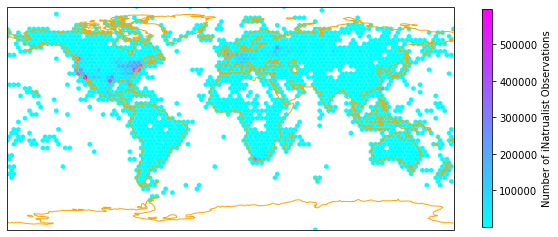

In [8]:
#determine figure size
fig = plt.figure(figsize=(10, 10))
hexmap(iNat['decimalLongitude'], iNat['decimalLatitude'], "Number of iNatrualist Observations")

#optional: Save figure
#plt.savefig('../Figures/iNat_density_hex.pdf', bbox_inches='tight')

### 🤖 Try it!

**The frquency distribution of observations seems to be skewed. Change the color bar to log-scale.**

Hint: Look up ```matplotlib.axes.Axes.hexbin```.

A second plotting option is to grid the data into a latitude/longitude grid. Then we can project our map onto a more realistic representation of the spherical Earth, such as the Robinson projection. The previously used ```hexbin``` function does not have a reprojection functionality implemented.

In [9]:
from matplotlib.colors import LogNorm, Normalize, BoundaryNorm
import cartopy.feature as cfeature # maps
import numpy as np

def gridmap(long, lat, label, projection, colorbar=True):
    
    plt.rcParams.update({'font.size': 15})

    Z, xedges, yedges = np.histogram2d(np.array(long,dtype=float),
                                   np.array(lat),bins = [181, 91])

    #https://stackoverflow.com/questions/67801227/color-a-2d-histogram-not-by-density-but-by-the-mean-of-a-third-column
    #https://medium.com/analytics-vidhya/custom-strava-heatmap-231267dcd084
    
    #let function know what projection provided data is in:
    data_crs = ccrs.PlateCarree()
    
    #for colorbar
    cmap = plt.get_cmap('cool')
    im_ratio = Z.shape[0]/Z.shape[1]

    #plot map
    #create base plot of a world map
    ax = fig.add_subplot(1, 1, 1, projection=projection) # I used the PlateCarree projection from cartopy
    
    # set figure to map global extent (-180,180,-90,90)
    ax.set_global()

    
    #add grid with values
    im = ax.pcolormesh(xedges, yedges, Z.T, cmap="cool", norm=LogNorm(), transform=data_crs)
    
    #add coastlines
    ax.coastlines(resolution='110m', color='orange', linewidth=1.3)
    
    #add color bar
    if colorbar==True:
        fig.colorbar(im,fraction=0.046*im_ratio, pad=0.04, shrink=0.3, location="left", label=label)



Apply the ```gridmap``` function to our iNaturalist observations and save output as ```.pdf```. You can also experiment with other projections. See https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html for inspiration:

In [10]:
iNat['scientificName'].value_counts()[:10].index.tolist()

['Achillea millefolium',
 'Taraxacum officinale',
 'Trifolium repens',
 'Alliaria petiolata',
 'Trifolium pratense',
 'Glechoma hederacea',
 'Larrea tridentata',
 'Phytolacca americana',
 'Prunella vulgaris',
 'Cichorium intybus']

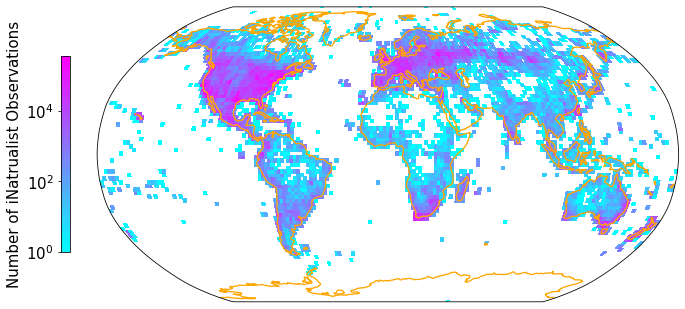

In [11]:
fig = plt.figure(figsize=(12, 12))

gridmap(iNat['decimalLongitude'], iNat['decimalLatitude'], "Number of iNatrualist Observations", ccrs.Robinson(0))

#Optional
#plt.savefig('../Figures/green_alt_iNat_density_Robinson_all.pdf', bbox_inches='tight')

### 🤖 Try it!

**Take a few minutes to play around with this function:**

**1. Change the projection of the map.** Hint: Look up "cartopy ccrs projections".

**2. Change the colors of the map.**

**Extra credit: Filter the iNaturalist dataset for a species of your interest and plot its global distribution as documented by citizen scientists.** Hint: To subset df: ```df[df['column_name']=="your species name"]```

---

## Make trait maps

In [34]:
# enables the %%R magic, needs to be installed and then activated only once per Notebook 
%load_ext rpy2.ipython

In [35]:
%%R

# Load iNat Data
iNat <- read.csv('iNat_TRY_log.csv')

In [36]:
%R head(iNat)

,gbifID,scientificName,decimalLatitude,decimalLongitude,eventDate,dateIdentified,Dispersal.unit.length,Leaf.Area,SLA,Leaf.C,...,Leaf.delta15N,Leaf.N.P.ratio,Leaf.P,Plant.Height,Seed.mass,Seed.length,Seeds.per.rep..unit,Stem.conduit.density,SSD,Conduit.element.length
1,1.229615e+09,Commelina communis,35.987483,-79.057546,2013-07-07T00:00:00,2013-07-07T20:33:11,NaN,NaN,NaN,NaN,...,NaN,2.5362,0.536493,NaN,2.13771,NaN,NaN,NaN,NaN,NaN
2,3.384000e+09,Commelina communis,42.093762,-75.923660,2021-08-23T13:06:06,2021-09-17T21:15:37,NaN,NaN,NaN,NaN,...,NaN,2.5362,0.536493,NaN,2.13771,NaN,NaN,NaN,NaN,NaN
3,1.807277e+09,Commelina communis,40.787636,-73.933728,2017-09-04T12:47:58,2017-09-04T21:58:57,NaN,NaN,NaN,NaN,...,NaN,2.5362,0.536493,NaN,2.13771,NaN,NaN,NaN,NaN,NaN
4,3.355124e+09,Commelina communis,39.643158,-76.764245,2020-08-26T10:19:56,2020-08-27T13:21:22,NaN,NaN,NaN,NaN,...,NaN,2.5362,0.536493,NaN,2.13771,NaN,NaN,NaN,NaN,NaN
5,1.802639e+09,Commelina communis,43.109505,1.622543,2017-10-21T10:01:00,2017-10-21T09:02:42,NaN,NaN,NaN,NaN,...,NaN,2.5362,0.536493,NaN,2.13771,NaN,NaN,NaN,NaN,NaN
6,1.898807e+09,Commelina communis,40.716092,-73.955880,2018-08-19T09:25:41,2018-08-19T13:35:18,NaN,NaN,NaN,NaN,...,NaN,2.5362,0.536493,NaN,2.13771,NaN,NaN,NaN,NaN,NaN


In [37]:
%%R

library(raster)

# get coordinates
xy <- cbind(iNat$decimalLongitude, iNat$decimalLatitude)
# raster dimensions 2 degree resolution map
r2 <- raster(ncols = 180, nrows = 90)

R[write to console]: Loading required package: sp

R[write to console]: code for methods in class “Rcpp_SpatCategories” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_SpatCategories” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_SpatDataFrame” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_SpatDataFrame” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_SpatExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_SpatExtent” was not checked for suspicious field assignments (

In [38]:
%%R

loop.vector <- 7:24 # loop over trait columns in dataframe
loop.vector

 [1]  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24


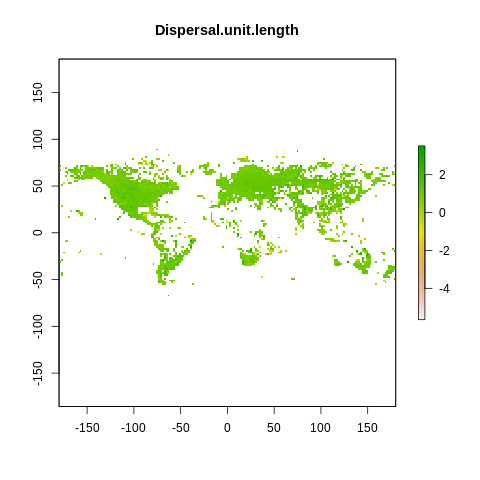

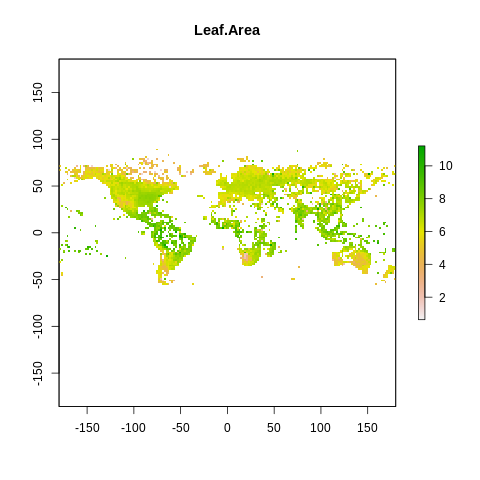

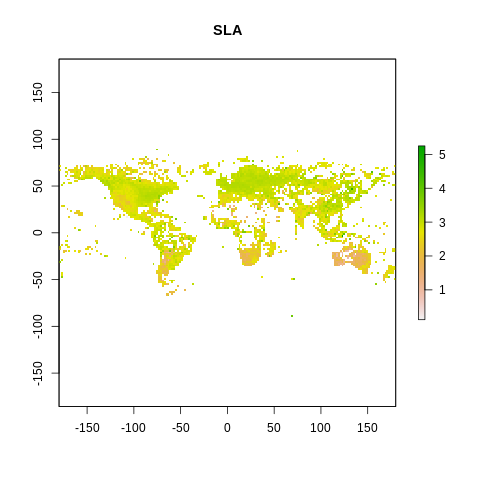

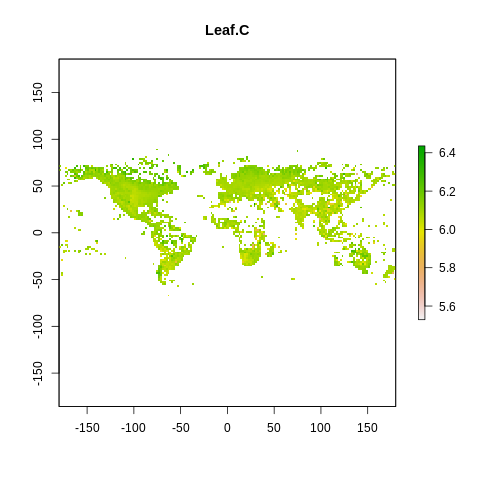

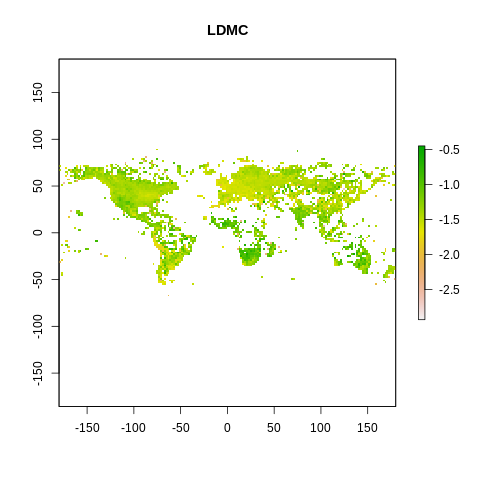

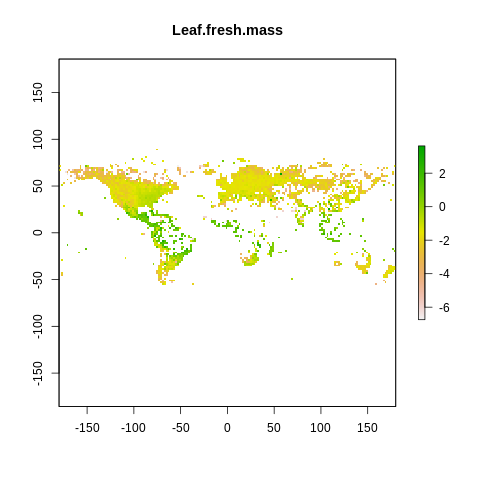

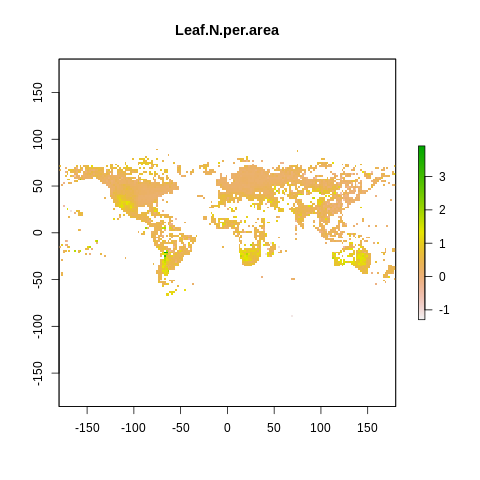

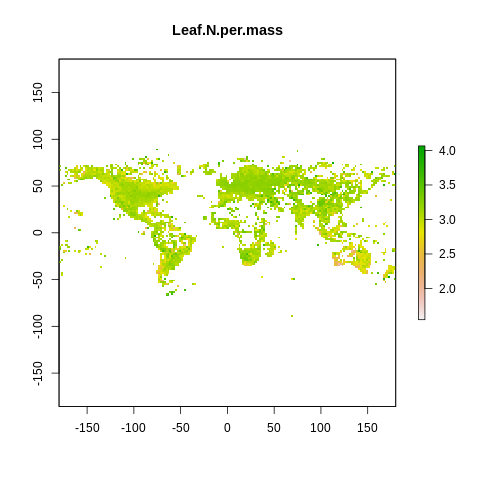

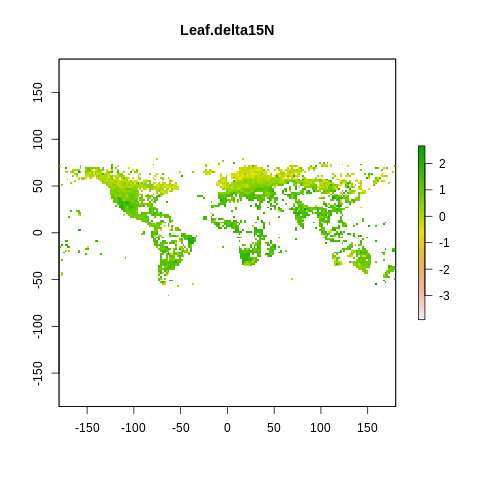

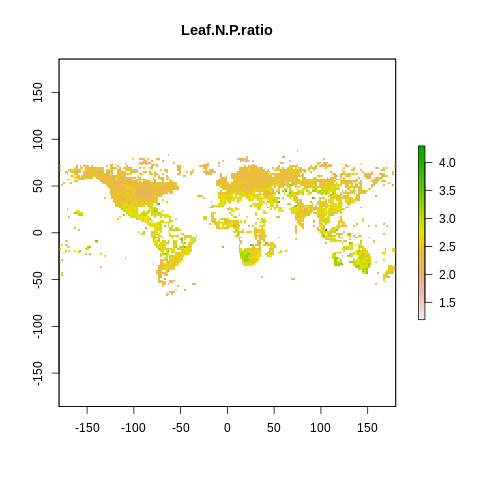

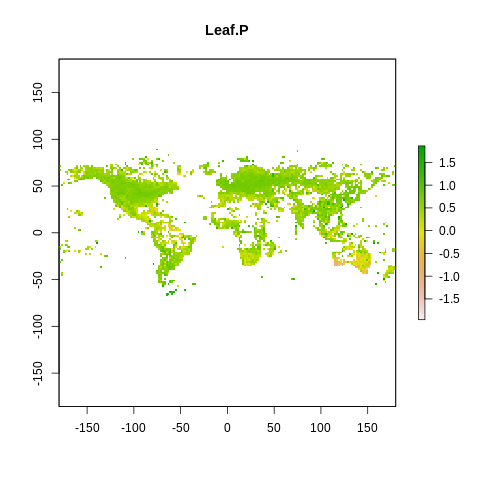

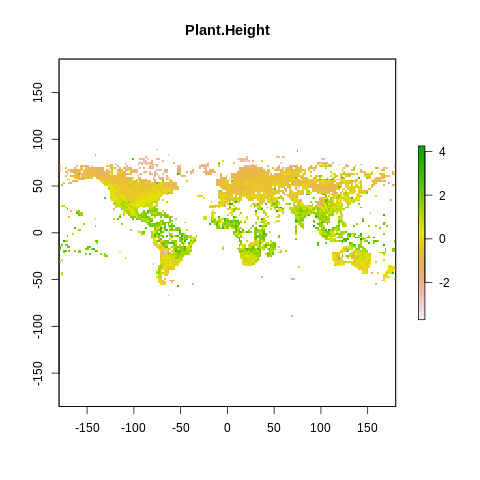

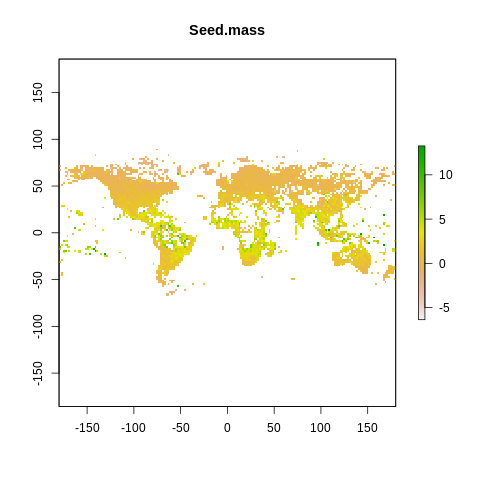

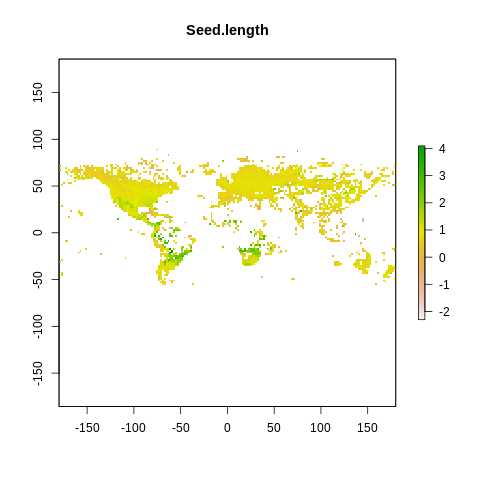

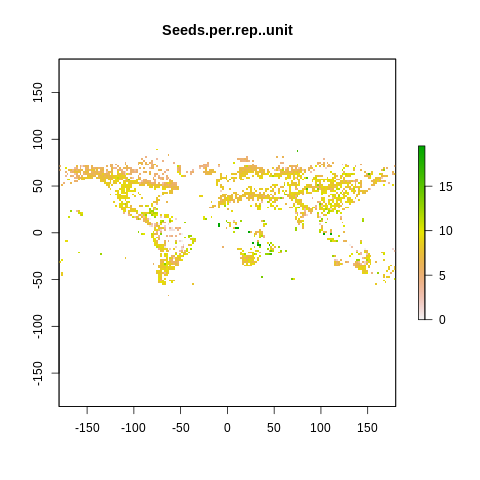

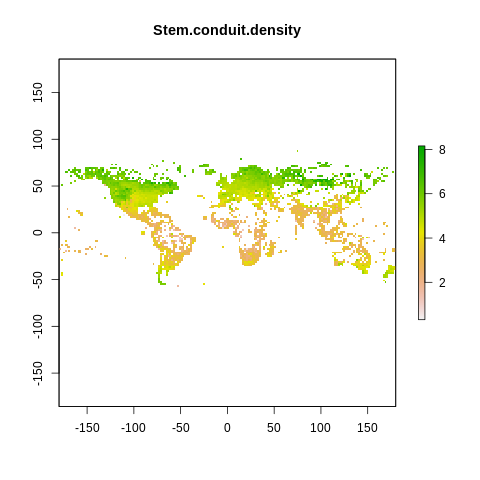

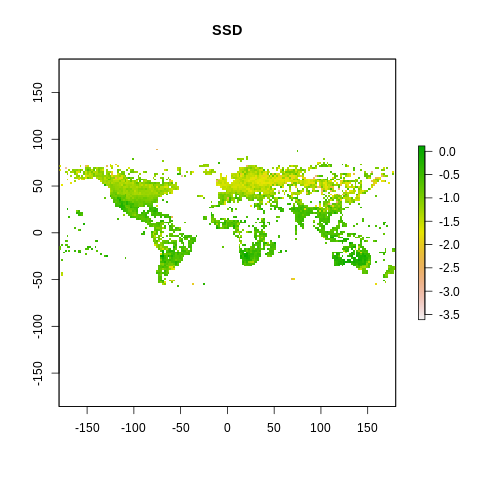

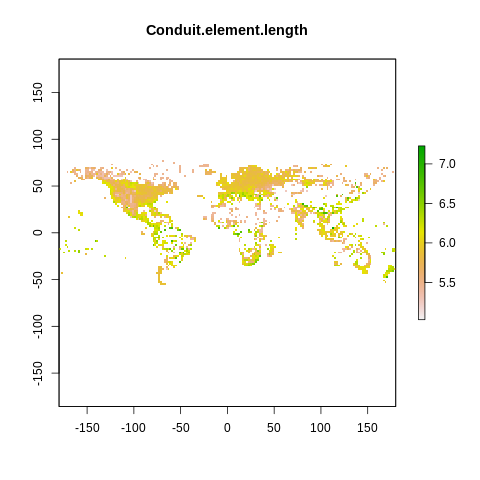

In [39]:
%%R

# export exp(ln()) maps in GeoTiff format

for (i in loop.vector) { # Loop over loop.vector
    vals <- iNat[,i]
    name <- colnames(iNat[i])
    # create a raster of all data and aggregate all observations as mean
    raster2 <- rasterize(xy, r2, vals, fun = mean)
    raster2[is.infinite(raster2)] <- NA
    crs(raster2) <- "+proj=longlat" #set projection
    
    # plot raster to check output
    plot(raster2, main=name)
    
    # write raster to GeoTiff
    filename = paste(name, "_iNat_2deg_ln.tif", sep="")
    writeRaster(raster2, filename, overwrite=TRUE)

}

## Import trait maps to dataframe

In [40]:
%%R

files <- list.files(path=".", pattern="_iNat_2deg_ln.tif", all.files=FALSE, full.names=TRUE, recursive=TRUE)
s <- stack(files)

In [41]:
%%R
files

 [1] "./Conduit.element.length_iNat_2deg_ln.tif"
 [2] "./Dispersal.unit.length_iNat_2deg_ln.tif" 
 [3] "./LDMC_iNat_2deg_ln.tif"                  
 [4] "./Leaf.Area_iNat_2deg_ln.tif"             
 [5] "./Leaf.C_iNat_2deg_ln.tif"                
 [6] "./Leaf.delta15N_iNat_2deg_ln.tif"         
 [7] "./Leaf.fresh.mass_iNat_2deg_ln.tif"       
 [8] "./Leaf.N.P.ratio_iNat_2deg_ln.tif"        
 [9] "./Leaf.N.per.area_iNat_2deg_ln.tif"       
[10] "./Leaf.N.per.mass_iNat_2deg_ln.tif"       
[11] "./Leaf.P_iNat_2deg_ln.tif"                
[12] "./Plant.Height_iNat_2deg_ln.tif"          
[13] "./Seed.length_iNat_2deg_ln.tif"           
[14] "./Seed.mass_iNat_2deg_ln.tif"             
[15] "./Seeds.per.rep..unit_iNat_2deg_ln.tif"   
[16] "./SLA_iNat_2deg_ln.tif"                   
[17] "./SSD_iNat_2deg_ln.tif"                   
[18] "./Stem.conduit.density_iNat_2deg_ln.tif"  


In [42]:
%%R
trait_names <- c(files)
trait_names <- gsub("*_iNat_2deg_ln.tif", "", trait_names)
trait_names <- gsub(".*./", "", trait_names)

names(s) <- trait_names
s

class      : RasterStack 
dimensions : 90, 180, 16200, 18  (nrow, ncol, ncell, nlayers)
resolution : 2, 2  (x, y)
extent     : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
crs        : NA 
names      : Conduit.element.length, Dispersal.unit.length,       LDMC,  Leaf.Area,     Leaf.C, Leaf.delta15N, Leaf.fresh.mass, Leaf.N.P.ratio, Leaf.N.per.area, Leaf.N.per.mass,     Leaf.P, Plant.Height, Seed.length,  Seed.mass, Seeds.per.rep..unit, ... 
min values :              5.0282569,            -5.6549921, -2.9296312,  0.6265936,  5.5286350,    -3.9120231,      -6.7456365,      1.1907276,      -1.2943509,       1.5475625, -1.9557816,   -3.6935570,  -2.3025851, -6.3584490,           0.0000000, ... 
max values :              7.2274203,             3.5189805, -0.4491783, 11.2158442,  6.4358296,     2.6623552,       3.6270041,      4.2953291,       3.9186676,       4.0655332,  1.8614928,    4.2484951,   4.0943446, 13.2652512,          19.5192928, ... 



In [43]:
%%R

df = as.data.frame(s)
head(df, 3)

  Conduit.element.length Dispersal.unit.length LDMC Leaf.Area Leaf.C
1                     NA                    NA   NA        NA     NA
2                     NA                    NA   NA        NA     NA
3                     NA                    NA   NA        NA     NA
  Leaf.delta15N Leaf.fresh.mass Leaf.N.P.ratio Leaf.N.per.area Leaf.N.per.mass
1            NA              NA             NA              NA              NA
2            NA              NA             NA              NA              NA
3            NA              NA             NA              NA              NA
  Leaf.P Plant.Height Seed.length Seed.mass Seeds.per.rep..unit SLA SSD
1     NA           NA          NA        NA                  NA  NA  NA
2     NA           NA          NA        NA                  NA  NA  NA
3     NA           NA          NA        NA                  NA  NA  NA
  Stem.conduit.density
1                   NA
2                   NA
3                   NA


In [44]:
%%R
 
summary(df)

 Conduit.element.length Dispersal.unit.length      LDMC          Leaf.Area     
 Min.   :5.028          Min.   :-5.655        Min.   :-2.930   Min.   : 0.627  
 1st Qu.:5.659          1st Qu.: 0.793        1st Qu.:-1.519   1st Qu.: 5.791  
 Median :5.881          Median : 1.035        Median :-1.395   Median : 6.663  
 Mean   :5.875          Mean   : 0.976        Mean   :-1.375   Mean   : 6.607  
 3rd Qu.:6.093          3rd Qu.: 1.218        3rd Qu.:-1.227   3rd Qu.: 7.488  
 Max.   :7.227          Max.   : 3.519        Max.   :-0.449   Max.   :11.216  
 NA's   :13890          NA's   :13382         NA's   :12914    NA's   :12820   
     Leaf.C      Leaf.delta15N    Leaf.fresh.mass  Leaf.N.P.ratio 
 Min.   :5.529   Min.   :-3.912   Min.   :-6.746   Min.   :1.191  
 1st Qu.:6.071   1st Qu.: 0.193   1st Qu.:-2.367   1st Qu.:2.348  
 Median :6.096   Median : 0.834   Median :-1.638   Median :2.478  
 Mean   :6.098   Mean   : 0.748   Mean   :-1.581   Mean   :2.512  
 3rd Qu.:6.126   3rd Qu.:

In [45]:
%%R

library(pcaMethods)

# convert back to original dimensions
df_exp <- exp(df)

# remove rows where all are NA
df_exp <- df_exp[rowSums(is.na(df_exp)) != ncol(df_exp), ]

# scale all variables
df_st <- scale(df_exp)

# calculate probobalistic pca
result <- pca(df_st, method="ppca", nPcs=2) #includes a mean tranform
scores <- scores(result)
loadings <- loadings(result)

R[write to console]: Loading required package: Biobase

R[write to console]: Loading required package: BiocGenerics

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:raster’:

    as.data.frame, intersect, match, union, unique, which.max,
    which.min


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


R[write to console]: Welcome to Bioconductor

    Vignettes contain introductory material;

In [46]:
%%R
result

ppca calculated PCA
Importance of component(s):
                 PC1    PC2
R2            0.2938 0.1416
Cumulative R2 0.2938 0.4354
18 	Variables
3848 	Samples
13262 	NAs ( 19.147 %)
2 	Calculated component(s)
Data was mean centered before running PCA 
Data was NOT scaled before running PCA 
Scores structure:
[1] 3848    2
Loadings structure:
[1] 18  2


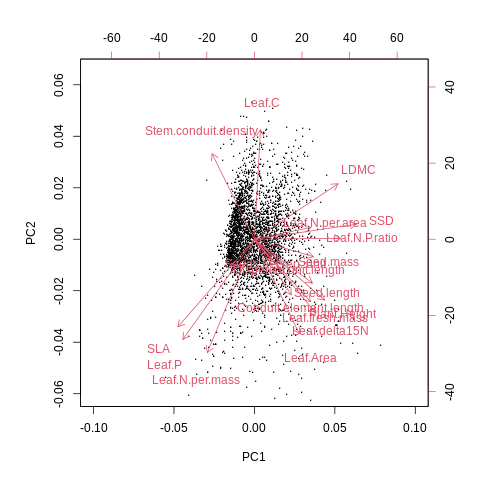

In [47]:
%%R

biplot(result,  xlabs = rep(".", nrow(df_st)), xlim=c(-0.10, 0.10), ylim=c(-0.06, 0.065))

### 🤖 Try it!

**1. Optimize this biplot to make it more ledgible. Use R or use ```%Rget``` to use the results with Python.**

**2. Plot the variance explained by each principle component. The code above calculates only the first two, you might want to change this.**

**3. This PCA represents the so-called spectrum of plant form and function. Compare your biplot visually to the the previously published versions based a) on only TRY trait data and b) sPlotOpen community data (see figures below).**


**a)** Díaz et al. 2016

<img align="left" src="Figures/Diaz_2016_spectrum.png" width="400" >


**b)** Bruelheide et al. 2018

<img align="left" src="Figures/Bruelheide_2018_spectrum.png" width="400" >
